$$ \Huge РАКЕТА $$

In [8]:
import math

MODEL_G = 9.81 # ускорение свободного падения
MODEL_DT = 0.01

class Rocket:
    def __init__(self, x, y, u, angle, M, m_topl, rasxod):
        """
        Параметры:
        ----------
        x: float
            горизонтальная координата
        y: float
            вертикальная координата
        u: float
            скорость относительного истечения газов из сопла
        alpha: float
            угол ракеты
        M: float
            масса всей ракеты
        m_topl: float
            масса топлива
        rasxod: float
            расход топлива 
        """

        self.x = x
        self.y = y
        self.u = u
        self.angle = angle
        self.M = M
        self.m_topl = m_topl
        self.rasxod = rasxod
        
        self.vx = 0
        self.vy = 0
        self.trajectory_x = []
        self.trajectory_y = []
        self.m = M  # Мгновенная масса
    
    def advance(self):
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        if self.m > self.M - self.m_topl:
            self.m -= self.rasxod * MODEL_DT
            self.vx += self.u * self.rasxod * math.cos(self.angle) / self.m * MODEL_DT 
            self.vy += (self.u * self.rasxod * math.sin(self.angle) / self.m - MODEL_G) * MODEL_DT
        else:
            self.vy -= MODEL_G * MODEL_DT

        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT

In [17]:
import numpy as np

x = 0
y = 0
u = 600
angle = math.pi/4
M = 1500
m_topl = 1000
rasxod = 70

r = Rocket(x, y, u, angle, M, m_topl, rasxod)

for t in np.arange(0, 200, MODEL_DT):
    if r.y >= 0:
            r.advance()

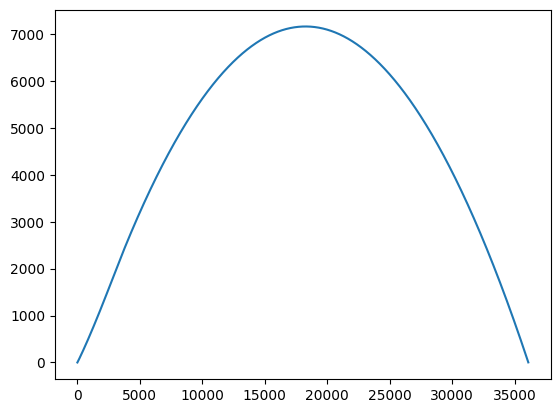

In [18]:
%matplotlib inline
from matplotlib import pyplot as pp
pp.plot(r.trajectory_x, r.trajectory_y)